In [1]:
from mmcv import Config
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector
from mmdet.datasets import (build_dataloader, build_dataset,
                            replace_ImageToTensor)

In [2]:
classes = ("UNKNOWN", "General trash", "Paper", "Paper pack", "Metal", "Glass", 
           "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing")
# config file 들고오기
cfg = Config.fromfile('./configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py')
PREFIX = '../../input/data/'

# dataset 바꾸기
cfg.data.train.classes = classes
cfg.data.train.img_prefix = PREFIX
cfg.data.train.ann_file = PREFIX + 'train.json'
cfg.data.train.pipeline[2]['img_scale'] = (512, 512)

cfg.data.val.classes = classes
cfg.data.val.img_prefix = PREFIX
cfg.data.val.ann_file = PREFIX + 'val.json'
cfg.data.val.pipeline[1]['img_scale'] = (512, 512)

cfg.data.test.classes = classes
cfg.data.test.img_prefix = PREFIX
cfg.data.test.ann_file = PREFIX + 'test.json'
cfg.data.test.pipeline[1]['img_scale'] = (512, 512)

cfg.data.samples_per_gpu = 4

cfg.seed=2020
cfg.gpu_ids = [0]
cfg.work_dir = './work_dirs/faster_rcnn_r50_fpn_1x_trash'

cfg.model.roi_head.bbox_head.num_classes = 11

cfg.optimizer_config.grad_clip = dict(max_norm=35, norm_type=2)

code/mmdetection_trash/configs/_base_/**default_runtime.py** 파일 수정
<br/>**project**는 개인에 맞게 수정

```python
log_config = dict(
    interval=50,
    hooks=[
        dict(type='TextLoggerHook'),
        dict(type='WandbLoggerHook',
             init_kwargs = dict(
                 project='',  # 개인에 맞게 수정
                 entity='boostcamp-simple',
                 name=None
             ))
])
```

In [3]:
############## To Visualize ##############
import os
from visualization import push_image

wandb_name = f"{cfg.model['type']}_v0"                 # wandb run name, 원하는 이름으로 변경
cfg.log_config.hooks[1].init_kwargs.name = wandb_name  # loss, acc 기록과 시각화 기록이 다른 Run에 저장되어, 이름을 통일해 두기 위함.

checkpoint_file = 'best_bbox_mAP.pth'
checkpoint_path = os.path.join(cfg.work_dir, checkpoint_file)
##########################################

In [4]:
model = build_detector(cfg.model)

2021-05-13 09:03:44,861 - mmdet - INFO - load model from: torchvision://resnet50
2021-05-13 09:03:44,863 - mmdet - INFO - Use load_from_torchvision loader
2021-05-13 09:03:45,119 - mmdet - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias



In [5]:
datasets = [build_dataset(cfg.data.train)]

loading annotations into memory...
Done (t=3.79s)
creating index...
index created!


In [6]:
train_detector(model, datasets[0], cfg, distributed=False, validate=True)

loading annotations into memory...


2021-05-13 09:04:02,448 - mmdet - INFO - Start running, host: root@fb205a752af1, work_dir: /opt/ml/code/mmdetection_trash/work_dirs/dsviz-demo
2021-05-13 09:04:02,449 - mmdet - INFO - workflow: [('train', 1)], max: 1 epochs


Done (t=0.93s)
creating index...
index created!


/opt/ml/code/mmdetection_trash/mmdet/core/evaluation/eval_hooks.py:111: UserWarning: runner.meta is None. Creating a empty one.
  warnings.warn('runner.meta is None. Creating a empty one.')
wandb: Currently logged in as: jaegyeong (use `wandb login --relogin` to force relogin)


2021-05-13 09:04:26,288 - mmdet - INFO - Epoch [1][50/655]	lr: 1.978e-03, eta: 0:03:42, time: 0.368, data_time: 0.051, memory: 2100, loss_rpn_cls: 0.5475, loss_rpn_bbox: 0.0788, loss_cls: 0.7748, acc: 84.1592, loss_bbox: 0.1785, loss: 1.5796, grad_norm: 7.0253
2021-05-13 09:04:42,640 - mmdet - INFO - Epoch [1][100/655]	lr: 3.976e-03, eta: 0:03:12, time: 0.327, data_time: 0.007, memory: 2100, loss_rpn_cls: 0.2276, loss_rpn_bbox: 0.0867, loss_cls: 0.4395, acc: 90.4600, loss_bbox: 0.3510, loss: 1.1048, grad_norm: 2.4255
2021-05-13 09:04:59,106 - mmdet - INFO - Epoch [1][150/655]	lr: 5.974e-03, eta: 0:02:52, time: 0.329, data_time: 0.007, memory: 2100, loss_rpn_cls: 0.2107, loss_rpn_bbox: 0.0864, loss_cls: 0.4686, acc: 89.4883, loss_bbox: 0.3771, loss: 1.1428, grad_norm: 3.4015
2021-05-13 09:05:15,357 - mmdet - INFO - Epoch [1][200/655]	lr: 7.972e-03, eta: 0:02:33, time: 0.325, data_time: 0.007, memory: 2100, loss_rpn_cls: 0.2037, loss_rpn_bbox: 0.0800, loss_cls: 0.4794, acc: 90.2275, loss

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 655/655, 21.9 task/s, elapsed: 30s, ETA:     0s

2021-05-13 09:08:15,704 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.83s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=8.05s).
Accumulating evaluation results...


2021-05-13 09:08:26,547 - mmdet - INFO - Now best checkpoint is epoch_1.pth.Best bbox_mAP_50 is 0.0740
2021-05-13 09:08:26,554 - mmdet - INFO - Epoch(val) [1][655]	bbox_mAP: 0.0310, bbox_mAP_50: 0.0740, bbox_mAP_75: 0.0200, bbox_mAP_s: 0.0040, bbox_mAP_m: 0.0270, bbox_mAP_l: 0.0610, bbox_mAP_copypaste: 0.031 0.074 0.020 0.004 0.027 0.061


DONE (t=1.81s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.031
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.074
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.020
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.004
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.027
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.061
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.103
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.103
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.103
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.022
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.095
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.213


train/loss_rpn_cls,0.13518
train/loss_rpn_bbox,0.08384
train/loss_cls,0.44699
train/acc,88.60156
train/loss_bbox,0.39266
train/loss,1.05868
train/grad_norm,2.56666
learning_rate,0.02
momentum,0.9
_runtime,263
_timestamp,1620896906


train/loss_rpn_cls,█▃▂▂▂▂▂▂▁▂▂▁▁
train/loss_rpn_bbox,▄██▄▂▇▆▄▂▄▁▁▆
train/loss_cls,█▁▂▂▂▂▁▁▁▂▁▁▁
train/acc,▁█▇█▇▆▆▇▆▆▇▆▆
train/loss_bbox,▁▆▆▆▇█▇▇▇▇▆▇▇
train/loss,█▂▃▂▂▃▂▁▁▂▁▁▁
train/grad_norm,█▁▃▃▂▂▂▂▂▂▁▁▁
learning_rate,▁▂▃▃▄▅▆▆▇█████
momentum,▁▁▁▁▁▁▁▁▁▁▁▁▁▁
_runtime,▁▁▂▂▃▃▄▄▅▅▆▆▇█
_timestamp,▁▁▂▂▃▃▄▄▅▅▆▆▇█


loading annotations into memory...
Done (t=0.87s)
creating index...
index created!


2021-05-13 09:10:16,694 - mmdet - INFO - load model from: torchvision://resnet50
2021-05-13 09:10:16,695 - mmdet - INFO - Use load_from_torchvision loader
2021-05-13 09:10:16,979 - mmdet - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias



Use load_from_local loader
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 655/655, 21.5 task/s, elapsed: 30s, ETA:     0sloading annotations into memory...
Done (t=1.05s)
creating index...
index created!


wandb: Currently logged in as: jaegyeong (use `wandb login --relogin` to force relogin)


_runtime,14
_timestamp,1620897066
_step,1


_runtime,▁█
_timestamp,▁█
_step,▁█


Done.


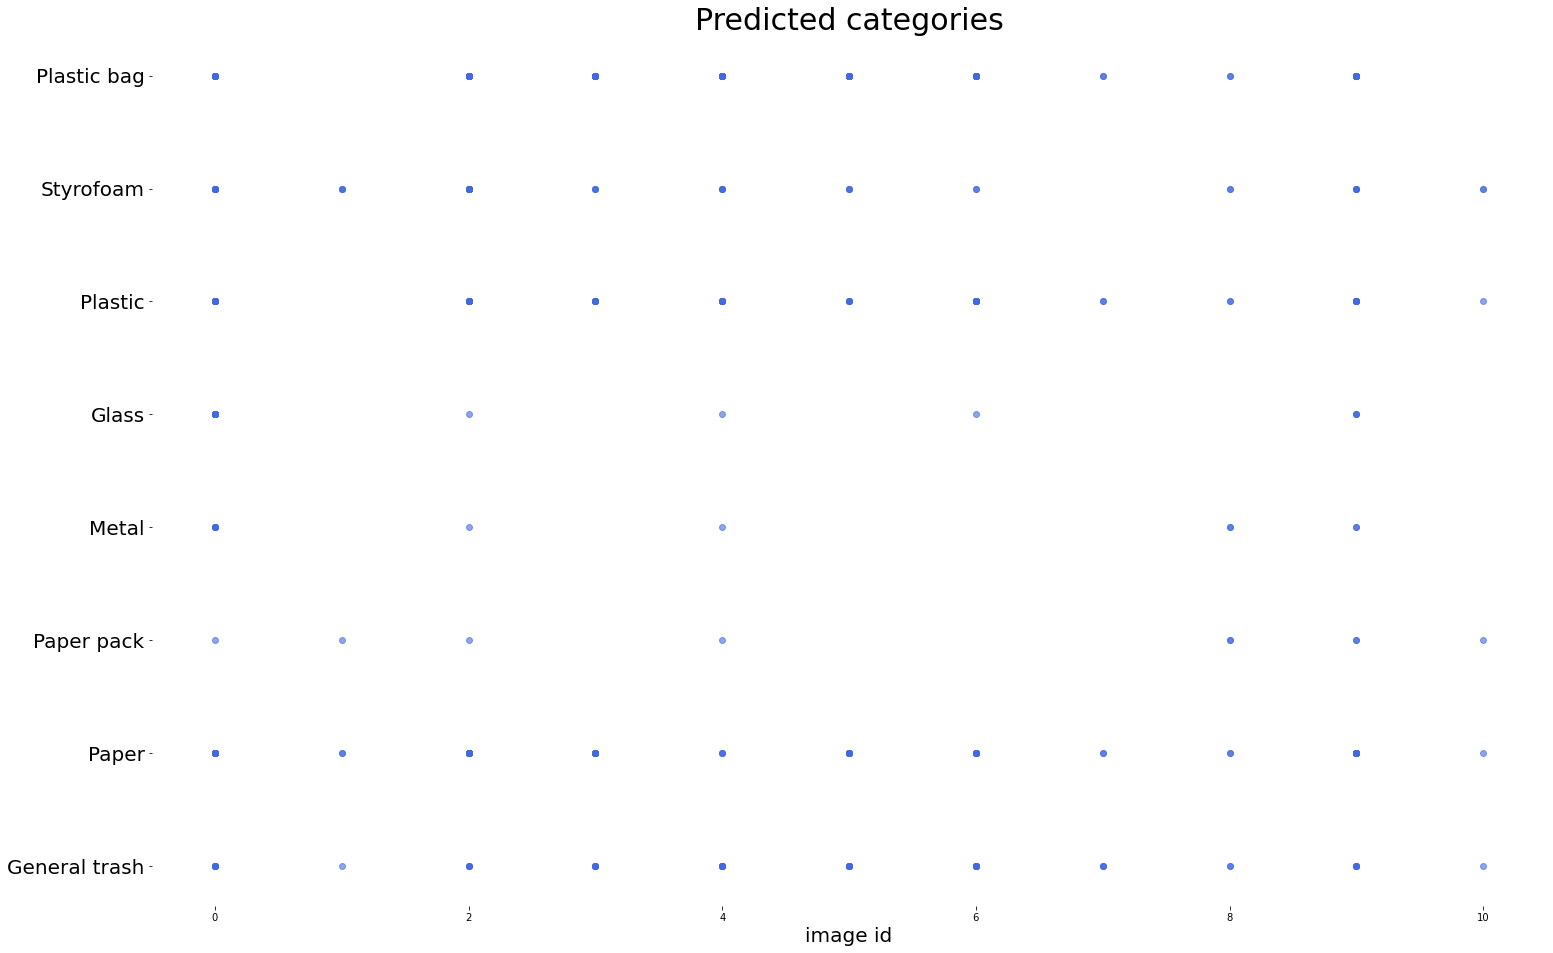

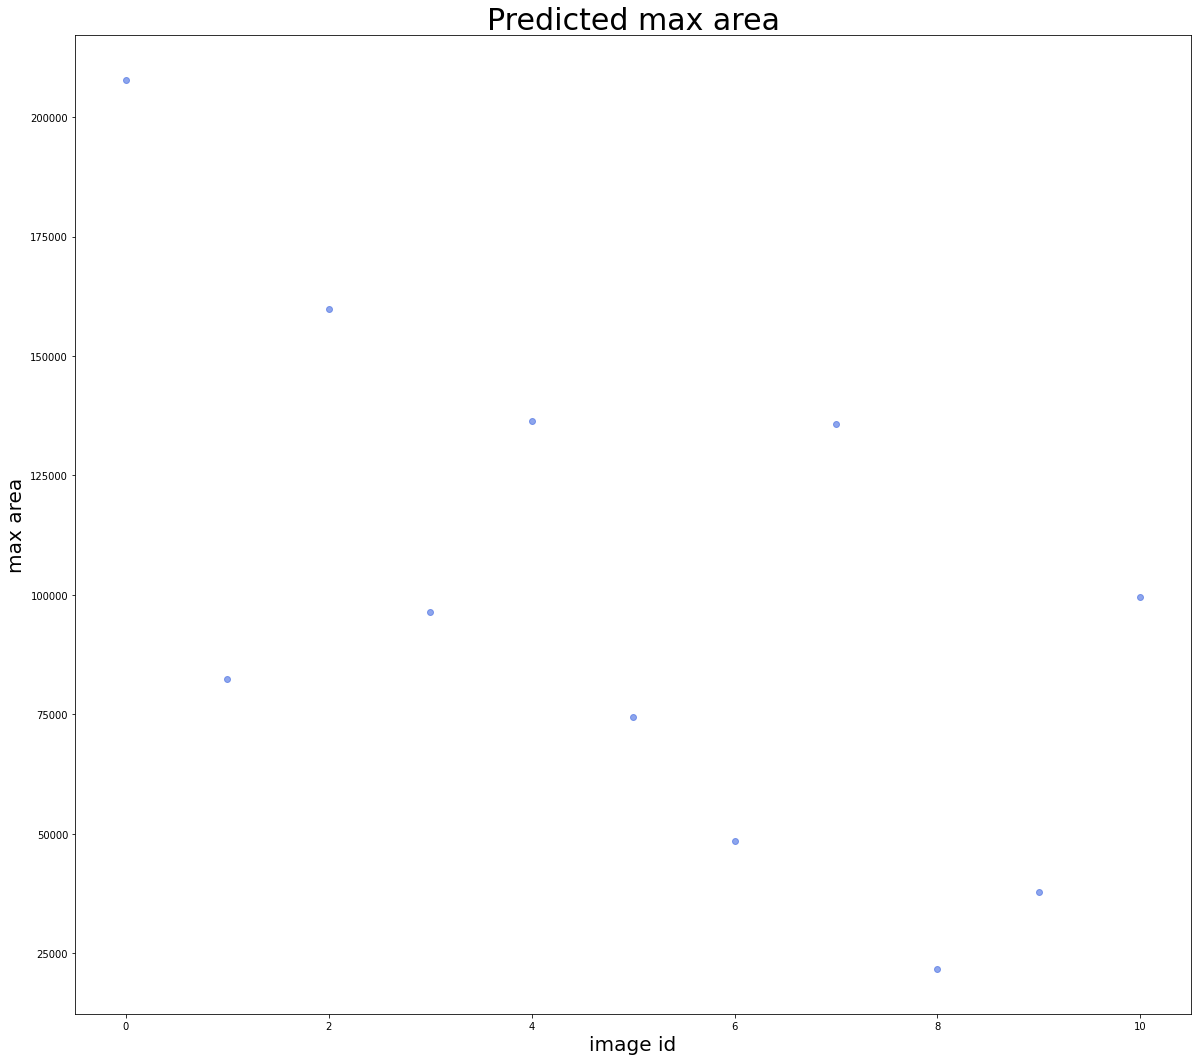

In [4]:
############## To Visualize ##############
push_image(cfg, checkpoint_path, wandb_name=wandb_name, img_num=10, mode="val", wandb_finish=True)
##########################################